# Loading and exploring the raw data
Our goal with this notebook is to load the tappy and users dataset in memory and start exploring to get some insights and identify potential problems

#### Steps:
- [x] Load tappy dataset
- [x] Explore tappy data
- [x] Dump the loaded dataframe in a file (later to be consumed by the feature engineering step)
- [x] Load users dataset
- [x] Explore uesrs data
- [x] Dump the loaded dataframe in a file

#### Prerequisites for this notebook:
- The downloaded and unzipped dataset files in the expected folder configured in `ProjectSetup`
- This can be done by simply running: `01_downloading.ipynb`

In [1]:
# First we must mount google drive 
from google.colab import drive

GDRIVE_BASE_PATH = '/content/gdrive'
drive.mount(GDRIVE_BASE_PATH)

# Loading our project setup
HOME_DIR = '/content/gdrive/My Drive/project_scs3253'
% cd $HOME_DIR
from util.project_setup import ProjectSetup

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/project_scs3253


## ====================================================================================
## 1. Exploring tappy data

**Tappy Files**: each file contains comma separated keystroke data for one month for a particular user. The filename comprises the 10 character code (matching the user details file) and the YYMM of the data. The fields are:

- **UserKey**: 10 character code for that user
- **Date**: YYMMDD
- **Timestamp**: HH:MM:SS.SSS
- **Hand**: L or R key pressed
- **Hold time**: Time between press and release for current key mmmm.m milliseconds
- **Direction**: Previous to current LL, LR, RL, RR (and S for a space key)
- **Latency time**: Time between pressing the previous key and pressing current key. Milliseconds
- **Flight time**: Time between release of previous key and press of current key. Milliseconds

In [2]:
# Let's load the tappy dataframe with our custom library.
# This library encapsulates the whole logic of loading all the data from different files
# returning a pandas dataframe as a result
from util.tappy_loader import TappyLoader
tappy_df = TappyLoader().load_raw_dataframe()
tappy_df.head()

,UserKey,Date,Timestamp,Hand,Hold time,Direction,Latency time,Flight time
0,4IE6CIRI0V,160705,17:08:04.723,R,15.6,LR,31.3,31.3
1,4IE6CIRI0V,160705,17:08:04.738,L,31.3,RL,31.3,31.3
2,4IE6CIRI0V,160705,17:08:04.770,R,62.5,LR,31.3,31.3
3,4IE6CIRI0V,160705,17:08:04.910,L,62.5,RL,15.6,78.1
4,4IE6CIRI0V,160705,17:08:04.973,L,15.6,LL,31.3,15.6


In [3]:
# We were able to parse most of the data! That's good :)
# Most likely we don't need to worry about the dropped observations
#
# Let's just take quick look into these bad lines just to have an idea
! head '/content/gdrive/My Drive/project_scs3253/data/bad_lines.txt'

4XPHKKBXS6	160922	23:11:31.734	L	0328.1	RL	0625.0	0484.44XPHKKBXS6	
4XPHKKBXS6	160929	08:13:47.008	R	4XPHKKBXS6	160929	L	0187.5	
5ARV4LHEJ0	160914	12:11:21.906	5ARV4LHEJ0	160914	12:20:50.980	0058.6	RR	
927ZLCPEJM	170215	09:40:57.891	R	0144.5	RR	0238.3	0136.7927ZLCPEJM	
6LB9FQABZQ	161008	19:33:16.406	R	0101.6	SR	0203.1	0116LB9FQABZQ	
6LB9FQABZQ	6LB9FQABZQ	161029	16:17:54.109	R	0121.1	AD	0375.0	
927ZLCPEJM	170304	00:00:00.078	L	-86399920.0	LL	0187.5	0023.4	
95S93AXF86	170130	11:27:03.801	R	0132.8	RR	0187.5	00795S93AXF86	
95S995S93AXF86	170131	02:52:37.672	L	0019.5	RL	0129.9	0129.9	
95S93AXF86	170201	05:07:25.02095S93AXF86	170201	09:40:11.043	R	LR	5D	


In [4]:
# We notice a truncating pattern when finishing writting some lines. It gets truncated and the new line
# start to be written in the truncated spot, messing up the new line too.
#
# It might be a problem with the local app that is recording the keystrokes and dumping the data from the
# memory into the file, or an FTP problem when transfering the local file to the central server.
# Anyways, they seem unrecoverable...
! tail '/content/gdrive/My Drive/project_scs3253/data/bad_lines.txt'

ZY9CCZY9CCHSPF2	170114	10:55:36.863	R	0066.4	RR	0152.3	0043.0	
ZY9CCHSPF2	170114	14:36:24.805	L	0144.ZY9CCHSPF2	170116	L	0140.6	
ZY9CCHSPF2	170116	20:16:ZY9CCHSPF2	170116	20:34:41.492	R	RR	AD	
ZY9CCHSPF2	170116	20:44:49.320	R	0046.9	LR	0101.6	0312.5ZY9CCHSPF2	
ZYWLN4JVLA	170122	14:54:55.0ZYWLN4JVLA	170122	20:18:54.812	L	LL	55	
YQSGN9BMVK	170213	08:01:13.852	R	0084.0	LR	07YQSGN9BMVK	170213	
YQSGN9BMVK	170301	10YQSGN9BMVK	170301	17:08:19.488	R	RR	CE	
YWMIQIQND3	160627	21:08:44YWMIQIQND3	160628	11:24:09.980	L	RL	C1	
ZEA4RST93H	160731	08:00:22.164	L	0119.1	SL	033ZEA4RST93H	160731	
ZEA4RST93H	160731	14:37:21.781	L	0105.5	RL	0183.6	0101.ZEA4RST93H	


In [5]:
# Due to our efficient parser, the dataframe is loaded with the correct types (float for times),
# and the classification columns are also consistent to the problem's definition.
# We might need to adjust the date and time though, but for now, let's explore
tappy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9315992 entries, 0 to 9315991
Data columns (total 8 columns):
UserKey         object
Date            object
Timestamp       object
Hand            object
Hold time       float64
Direction       object
Latency time    float64
Flight time     float64
dtypes: float64(3), object(5)
memory usage: 568.6+ MB


In [6]:
# We should not expect any null values because the parser took care of it
tappy_df.isnull().values.any()

False

### ==============================================================================================
### 1.1 Checking the categorical values

In [7]:
# Our parser took care of this, but why not double check?
print(tappy_df['Hand'].value_counts())
print(tappy_df['Direction'].value_counts())

L    4389136
R    3308943
S    1617913
Name: Hand, dtype: int64
LL    1957321
RL    1648766
LR    1545156
RR    1304218
LS     969115
SL     783049
RS     570369
SR     459569
SS      78429
Name: Direction, dtype: int64


In [0]:
# Interesting insight, the left side is more frequent than the right side.
# The space bar is the least frequent keystroke as expected

### ==============================================================================================
### 1.2 Evaluating the amount of users and observations per user

In [9]:
users_count = tappy_df['UserKey'].value_counts()
print(f'Number of distinct users: {users_count.shape[0]}')

Number of distinct users: 266


In [10]:
print('Users with more observations:')
users_count.head()

Users with more observations:


NPACI6EW26    1073681
6WBXSDG5BB     711333
G6OE5CXQPY     658810
XWAX2IHF3O     619117
COK8G1W7JY     416915
Name: UserKey, dtype: int64

In [11]:
# It seems we'll need to disconsider some of the users because they don't have a significant amount
# of obsevations. As we can see, these ones have only 1 to 4 keys pressed. It does not make any sense
# work with them. Let's keep moving
print('Users with less observations:')
users_count.tail()

Users with less observations:


L7Q16SJ7KP    4
M0PBVLISCF    2
VDKQJZARYF    2
VZWQROMTLO    2
XQIXWF0BXG    1
Name: UserKey, dtype: int64

In [12]:
# Another perspective is to visualize days with observation per users
temp_df = tappy_df[['UserKey', 'Date']].groupby('UserKey').nunique()[['Date']]
temp_df.rename(columns={'Date':'days_with_observation'}, inplace=True)
temp_df.sort_values('days_with_observation', inplace=True)
print(temp_df.head())
temp_df.describe()

            days_with_observation
UserKey                          
GN1CUIPUTJ                      1
KEWWVGP2NM                      1
7QVQD5IJEH                      1
UMZFEO7IAG                      1
UFMGBC58XD                      1


,days_with_observation
count,266.000000
mean,31.909774
std,47.930131
min,1.000000
25%,2.250000
50%,10.500000
75%,38.750000
max,230.000000


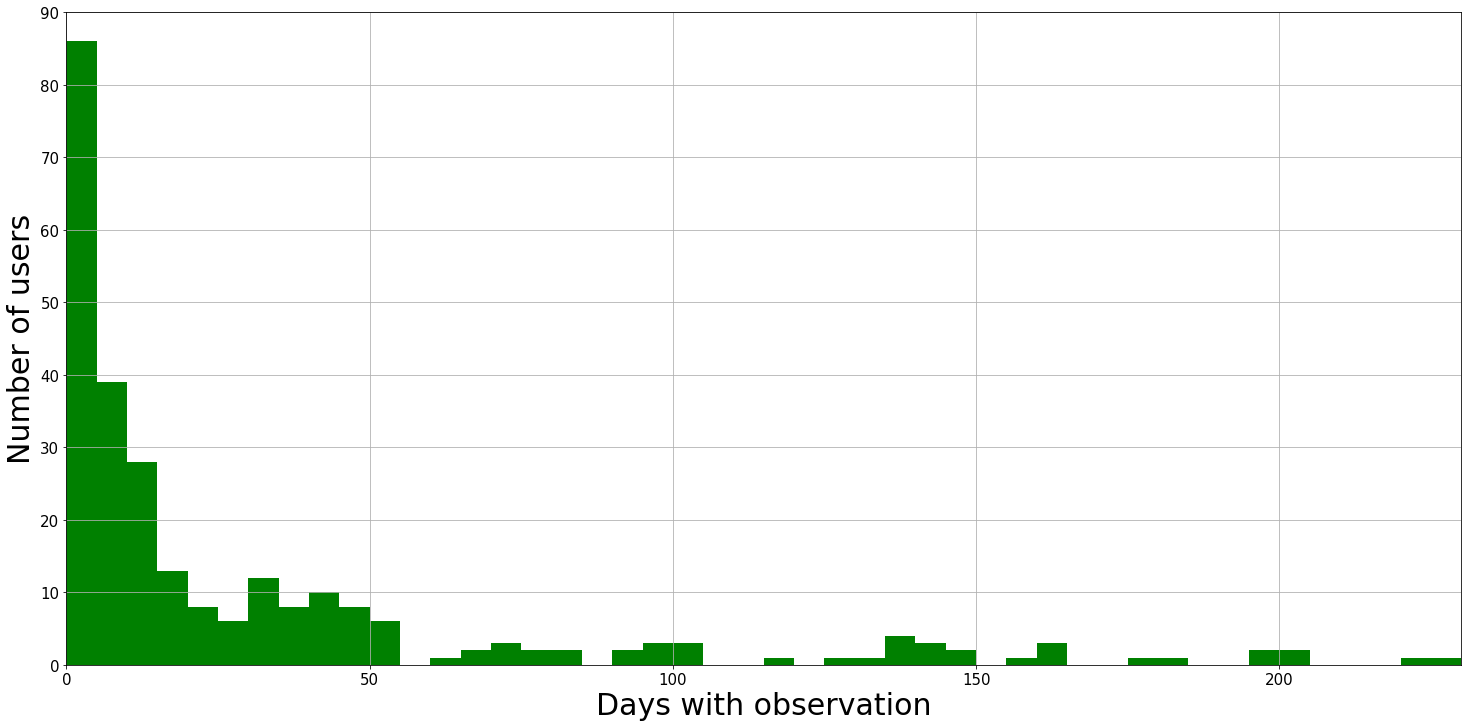

In [13]:
# Let's plot a histogram showing the amount of users in each bucket
import matplotlib.pyplot as plt
import numpy as np

# The bins are 0 to 4 days with observation, 5 to 9, 10 to 14, and so forth
bin_width = 5
bins = np.arange(0, max(temp_df.days_with_observation) + bin_width, bin_width)

plt.figure(figsize=(25,12))
n, bins, patches = plt.hist(temp_df.days_with_observation, bins=bins, facecolor='green')
plt.plot(bins, linewidth=0)

plt.xlabel('Days with observation', fontsize=30)
plt.ylabel('Number of users', fontsize=30)
plt.tick_params(labelsize=15)
plt.axis([0, max(temp_df.days_with_observation), 0, 90])
plt.grid(True)

plt.show()

In [14]:
# So more than 80 users have 4 or less days with observation. If we decide to ignore them from the final dataset we would have
print(f"{len(temp_df[temp_df.days_with_observation > 4])} users with 5 or more days with observations")
print(f"{len(temp_df[temp_df.days_with_observation > 9])} users with 10 or more days with observations")

180 users with 5 or more days with observations
141 users with 10 or more days with observations


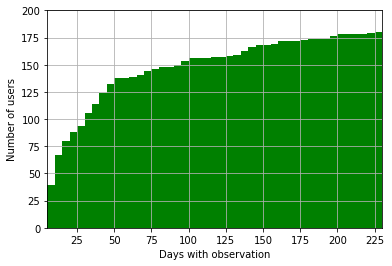

In [15]:
# Another way to look into this is through a cumulative histogram
# As we can see, most users have at most 50 days with observation, accounting for ~130 users,
# The remaining ~50 users (~27%) will have more than 50 days.
#
# This means that we cannot observe the progression of the disease in longs periods of time
# like 3 months to a year
import matplotlib.pyplot as plt
import numpy as np

bin_width = 5
bins = np.arange(bin_width, max(temp_df.days_with_observation) + bin_width, bin_width)

n, bins, patches = plt.hist(temp_df.days_with_observation, bins=bins, facecolor='green', cumulative=1)
plt.plot(bins, linewidth=0)

plt.xlabel('Days with observation')
plt.ylabel('Number of users')
plt.axis([5, max(temp_df.days_with_observation), 0, 200])
plt.grid(True)

plt.show()

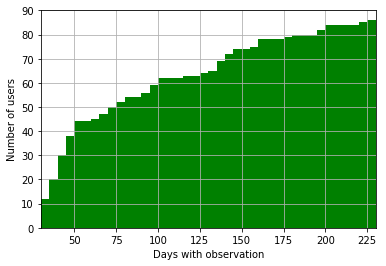

In [16]:
# What if we want only users with 30 days or more?
# A: Around 85 users
import matplotlib.pyplot as plt
import numpy as np

bin_width = 5
bins = np.arange(30, max(temp_df.days_with_observation) + bin_width, bin_width)

n, bins, patches = plt.hist(temp_df.days_with_observation, bins=bins, facecolor='green', cumulative=1)
plt.plot(bins, linewidth=0)

plt.xlabel('Days with observation')
plt.ylabel('Number of users')
plt.axis([30, max(temp_df.days_with_observation), 0, 90])
plt.grid(True)

plt.show()

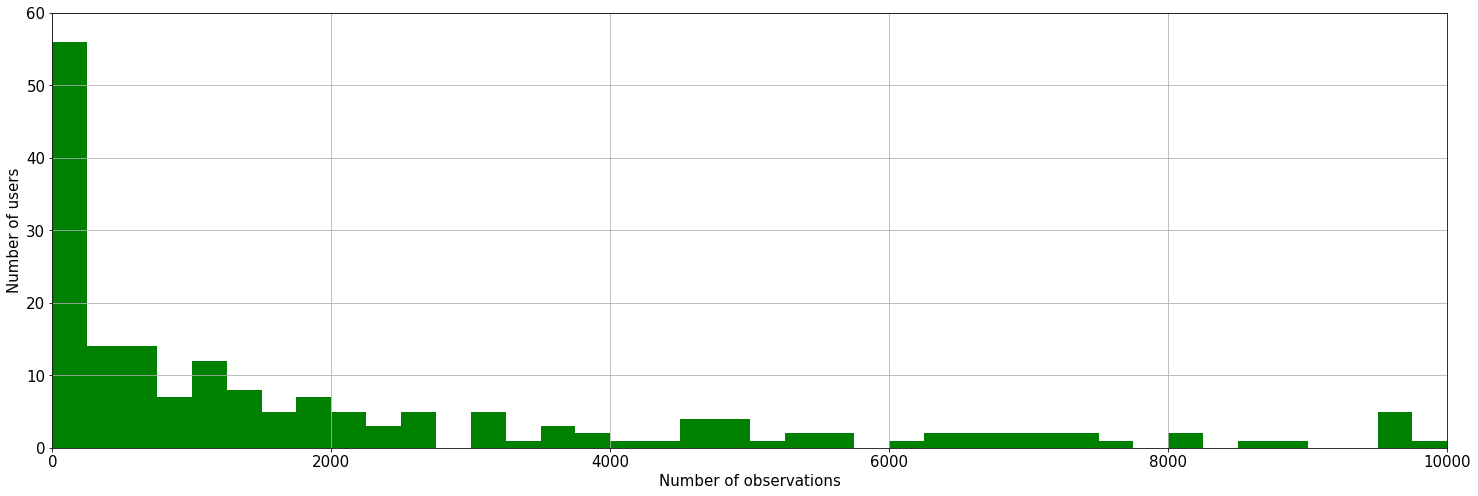

In [17]:
# What about observations (or keystrokes) per user?
temp_df = tappy_df[['UserKey', 'Date']].groupby('UserKey').count()[['Date']]
temp_df.rename(columns={'Date':'observations'}, inplace=True)
temp_df.sort_values('observations', inplace=True)


import matplotlib.pyplot as plt
import numpy as np

bin_width = 250
bins = np.arange(0, max(temp_df.observations) + bin_width, bin_width)

plt.figure(figsize=(25,8))
n, bins, patches = plt.hist(temp_df.observations, bins=bins, facecolor='green')
plt.plot(bins, linewidth=0)

plt.xlabel('Number of observations', fontsize=15)
plt.ylabel('Number of users', fontsize=15)
plt.tick_params(labelsize=15)
plt.axis([0, 10000, 0, 60])
plt.grid(True)

plt.show()

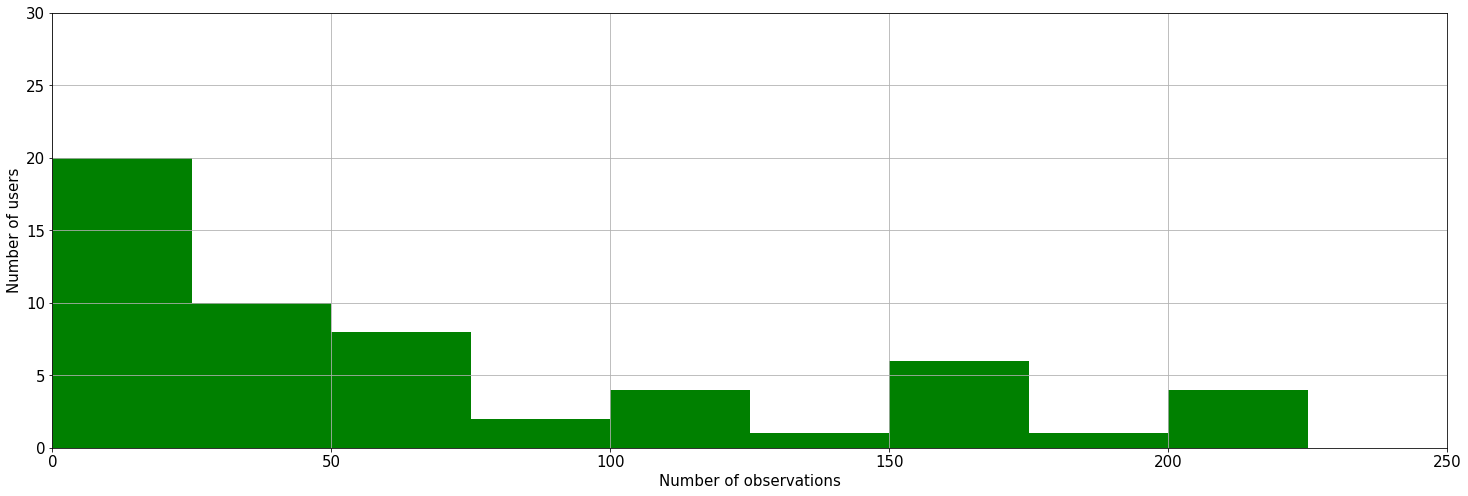

In [18]:
# The 250 keystrokes zoom
import matplotlib.pyplot as plt
import numpy as np

bin_width = 25
zoom_to = 250
bins = np.arange(0, zoom_to + bin_width, bin_width)

plt.figure(figsize=(25,8))
n, bins, patches = plt.hist(temp_df.observations, bins=bins, facecolor='green')
plt.plot(bins, linewidth=0)

plt.xlabel('Number of observations', fontsize=15)
plt.ylabel('Number of users', fontsize=15)
plt.tick_params(labelsize=15)
plt.axis([0, zoom_to, 0, 30])
plt.grid(True)

plt.show()

### ==============================================================================================
### 1.3 Hold, latency and flight time

In [19]:
# Again, ~9 milion of keystrokes, and we can see the rest of the stats for each time column
tappy_df.describe().round(2)

,Hold time,Latency time,Flight time
count,9315992.00,9315992.00,9315992.00
mean,120.10,260.10,185.96
std,1615.84,137.73,127.81
min,0.00,1.00,1.00
25%,78.10,164.10,93.80
50%,101.60,230.50,160.20
75%,140.00,324.20,250.00
max,928765.60,799.90,799.90


Hold time outliers starting at 232.9
Latency time outliers starting at 564.5
Flight time outliers starting at 484.4


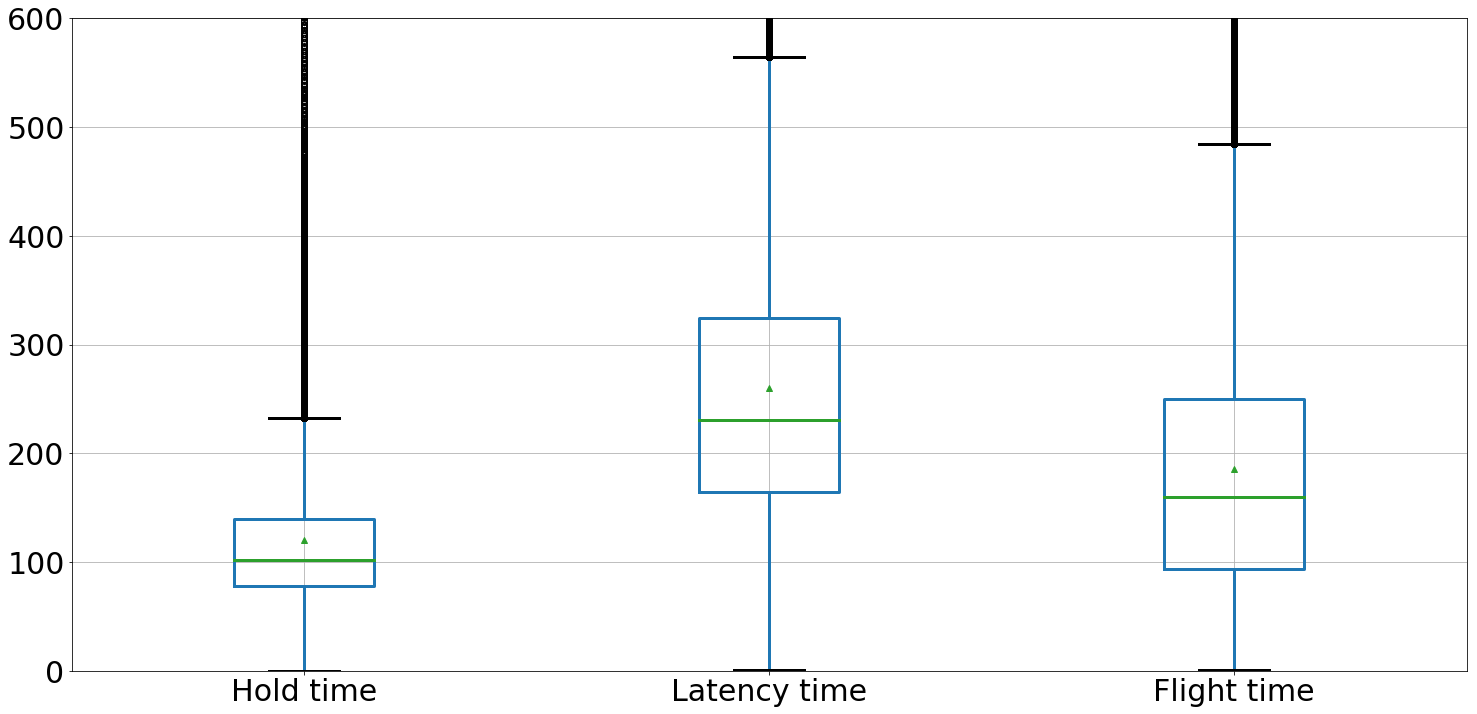

In [20]:
# Another way to look into these stats is using boxplot
# When we plot latency and flight, we can quickly notice the outliers
# Most likely we'll discard those from the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(25,12))
ax, boxdata = tappy_df.boxplot(
  column=['Hold time', 'Latency time','Flight time'], showfliers=True, showmeans=True,
  fontsize=30, return_type='both'
)
ax.set_ylim(0, 600)

for line_2d in boxdata.values():
  for item in line_2d:
    item.set_linewidth(3)

# Hold time has a much higher rate of outliers. The max value is 928765.60 which is 15 minutes of someone holding the key!!
# Either a bug on the recorder or someone slept on the computer
outliers_ht = boxdata['fliers'][0].get_ydata()
print(f'Hold time outliers starting at {min(outliers_ht)}')

outliers_lt = boxdata['fliers'][1].get_ydata()
print(f'Latency time outliers starting at {min(outliers_lt)}')

outliers_ft = boxdata['fliers'][2].get_ydata()
print(f'Flight time outliers starting at {min(outliers_ft)}')

plt.show()

In [21]:
# What if we drop all hold time outliers from the boxplot??
drop_count = len(tappy_df[tappy_df['Hold time'] >= min(outliers_ht)])
print(f"If we say that hold time >= {min(outliers_ht)} are outliers, we would drop {drop_count} tappy observations")

If we say that hold time >= 232.9 are outliers, we would drop 362053 tappy observations


In [22]:
# It seems super aggressive to simply drop all outliers according to the boxplot data.
# Latency and flight time are maxing on 800 milliseconds, which seems reasonable. So we shouldn't touch them.
#
# But hold time is a different story. The boxplot is showing that all observations over 232.9 are outliers, but this seems
# very unreasonable since we are talking about 0.23 seconds of a keypress (and 350k of records)

# What about the 99.99%??
# 99.99% are under 1.1 seconds, maybe this could be the cut off for outliers
tappy_df.quantile(q=0.9999)['Hold time']

1105.5

In [23]:
outlier_cutoff_in_ms = 1000
temp_df = tappy_df[tappy_df['Hold time'] > outlier_cutoff_in_ms]
print(f"If ~0.01% (more than 1 second) are considered as outliers we would drop {len(temp_df)} keystrokes")

users_count = temp_df['UserKey'].value_counts()
print(f"{len(users_count)} users would be affected:")
users_count

If ~0.01% (more than 1 second) are considered as outliers we would drop 1006 keystrokes
43 users would be affected:


ZEA4RST93H    468
JMIVIRFQRR    227
XWAX2IHF3O    152
WBS5I7VF1G     19
ZGZJSOXBWP     18
LSQWWDXEYO     13
EMYGMAIB2L     10
RWQHSVOUGI      8
GHRLW1IJRV      8
M0MTCXU0MH      8
8EY6NZAKCI      8
QAH9IVALVC      6
C6UGS6P0J0      5
CEU6KM05RU      5
FXC5YFXZ0K      5
6WBXSDG5BB      4
95S93AXF86      4
MG8XVA5BFA      4
VVYPNRQ5KG      3
CAXCJIKLYM      2
GRPUBQLE4F      2
FFNMFHHSZJ      2
AFNOZ1KI1M      2
927ZLCPEJM      2
9JRHCGCWAZ      2
39KQRZCESF      2
SDZPQV3VZ1      1
FIWPKLWCT5      1
LKR3NUMIFS      1
HB2JCE24IE      1
WXNQ0QM0XD      1
QEYMRM1ZSM      1
SOP2REQFUH      1
PRG54RZY7X      1
Z1QLXS3DGS      1
VIAXR21TSC      1
M4ARHBY168      1
BIGWMXFU3B      1
8O9IAIA9L1      1
YQSGN9BMVK      1
SKLXBAOSN4      1
NPACI6EW26      1
IZBOYJGXXB      1
Name: UserKey, dtype: int64

### ==============================================================================================
### 1.4 Conclusions for tappy

- No null values to handle, so great!
- Lot's of outliers for hold time. We should discard keystrokes with hold time higher than 1000 (1 second)
- The other time variables seem OK (they are maxed at 800) which seems reasonable to keep
- Flight time seems inconsistent to its definition. We should probably discard since its information is already present inside latency time
- Unfortunately, most of the users have fewer days with observation. Roughly 50% have 9 or less days recorded. That makes it harder to derive some features like progression throughout time (i.e. is the latency increasing?)
- We might need to limit users with a minimum amount of keystrokes since they migth introduce a lot of variance in the dataset. The problem is that ~56 users have less than 250 keystrokes.

### ==============================================================================================
### 1.5 Dumping this raw tappy dataframe

In [24]:
# This will adjust the column names and dump the pandas dataframe,
# in the expected format, to the file system
TappyLoader().convert_and_dump_dataframe(tappy_df).head()

Dataframe exported to /content/gdrive/My Drive/project_scs3253/data/tappy_parsed_dataframe_file.csv


,userkey,date,timestamp,hand,hold_time,direction,latency_time,flight_time
0,4IE6CIRI0V,160705,17:08:04.723,R,15.6,LR,31.3,31.3
1,4IE6CIRI0V,160705,17:08:04.738,L,31.3,RL,31.3,31.3
2,4IE6CIRI0V,160705,17:08:04.770,R,62.5,LR,31.3,31.3
3,4IE6CIRI0V,160705,17:08:04.910,L,62.5,RL,15.6,78.1
4,4IE6CIRI0V,160705,17:08:04.973,L,15.6,LL,31.3,15.6


## ====================================================================================
## 2. Exploring users data

**Users Files**: The filename of each user file contains a 10 character code, used to cross reference to the keystroke data files for that user. 

- **BirthYear**: User's year of birth (YYYY)
- **Gender**: Their gender [Male/Female]
- **Parkinsons**: Whether the have parkinson's or not [True/False]
- **Tremors**: Whether they have tremors [True/False]
- **Diagnosis Year**: If they have Parkinson's, when was it first diagnosed
- Whether there is **sidedness** of movement [Left/Right/None] (self reported)
- **UPDRS**: The UPDRS score (if known) [1 to 5]
- **Impact**: The Parkinsons disease severity or impact on their daily life [Mild/Medium/Severe] (self reported)
- **Levadopa**: Whether they are using Sinemet and the like [Yes/No]
- **DA**: Whether they are using a dopamine agonist [Yes/No]
- **MAOB**: Whether they are using an MAO-B inhibitor [Yes/No]
- **Other**: Whether they are taking another Parkinson's medication [Yes/No]

In [56]:
# Let's load the users dataframe with our custom library.
# Once again, this library encapsulates the whole logic of loading the raw data.
from util.users_loader import UsersLoader
users_df = UsersLoader().load_raw_dataframe()
users_df.head()

,Gender,BirthYear,Parkinsons,Tremors,DiagnosisYear,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other
M4ARHBY168,Female,1950.0,False,False,------,Left,Don't know,------,False,False,False,False
0EA27ICBLF,Female,1952.0,True,True,2000,Left,Don't know,Severe,True,True,False,False
E7UA8EHENF,Male,1951.0,True,True,2013,Right,Don't know,Medium,True,False,False,False
MDL9KS0SFL,Female,NaN,True,False,NaN,None,Don't know,Mild,False,False,True,True
0QAZFRHQHW,Female,1959.0,False,False,------,None,Don't know,------,False,False,False,False


In [26]:
# The types seem messy. We'll need to fix that later
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 227 entries, M4ARHBY168 to ZYWLN4JVLA
Data columns (total 12 columns):
Gender           227 non-null object
BirthYear        187 non-null float64
Parkinsons       227 non-null bool
Tremors          227 non-null bool
DiagnosisYear    208 non-null object
Sided            227 non-null object
UPDRS            219 non-null object
Impact           223 non-null object
Levadopa         227 non-null bool
DA               227 non-null bool
MAOB             227 non-null bool
Other            227 non-null bool
dtypes: bool(6), float64(1), object(5)
memory usage: 13.7+ KB


### ==============================================================================================
### 2.1 Initial check of different features and null values

In [27]:
# A quick check on the boolean values directly from the raw files.
# We should expect 227, as the info above, and only `True` or `False`
def check_boolean_var_from_files(feature):
  ! grep '$feature': '$ProjectSetup.raw_users_dir'/*.txt -h | wc -l
  ! grep '$feature': '$ProjectSetup.raw_users_dir'/*.txt -h | sort | uniq

features = ['Parkinsons','Tremors','Levadopa','DA','MAOB','Other']
for feature in features:
  check_boolean_var_from_files(feature)

227
Parkinsons: False
Parkinsons: True
227
Tremors: False
Tremors: True
227
Levadopa: False
Levadopa: True
227
DA: False
DA: True
227
MAOB: False
MAOB: True
227
Other: False
Other: True


In [28]:
# Let's count the users with null features
null_df = users_df[users_df.isnull().any(axis=1)]
null_count = len(null_df)

print(f'{null_count} users with null features')
print(f'{len(users_df) - null_count} without null features (but they might have trash data though...)')

51 users with null features
176 without null features (but they might have trash data though...)


In [29]:
# Quick view on the first users with null
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
null_df.head()

,Gender,BirthYear,Parkinsons,Tremors,DiagnosisYear,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other
MDL9KS0SFL,Female,NaN,True,False,NaN,None,Don't know,Mild,False,False,True,True
EBGLZDVO5S,Female,1953.0,True,True,2004,Left,NaN,Medium,True,False,False,True
MQJBGHOEXP,Male,NaN,False,False,------,None,Don't know,------,False,False,False,False
ERFIZ5O8FM,Male,NaN,True,False,2010,None,Don't know,Severe,True,False,True,False
3LBXTMXULC,Female,NaN,True,True,2016,Left,Don't know,Medium,False,False,False,True


In [30]:
# We already checked the booleans directly in the files, just another quick look, but now in the dataframe
def quick_value_counts_eval(feature, df):
  counts = df[feature].value_counts()
  print(f'Total = {counts.sum()} || Missing = {len(df) - counts.sum()} > {((len(df) - counts.sum()) / len(df))*100}%\n')
  print(counts)
  
quick_value_counts_eval('Parkinsons', users_df)

Total = 227 || Missing = 0 > 0.0%

True     169
False     58
Name: Parkinsons, dtype: int64


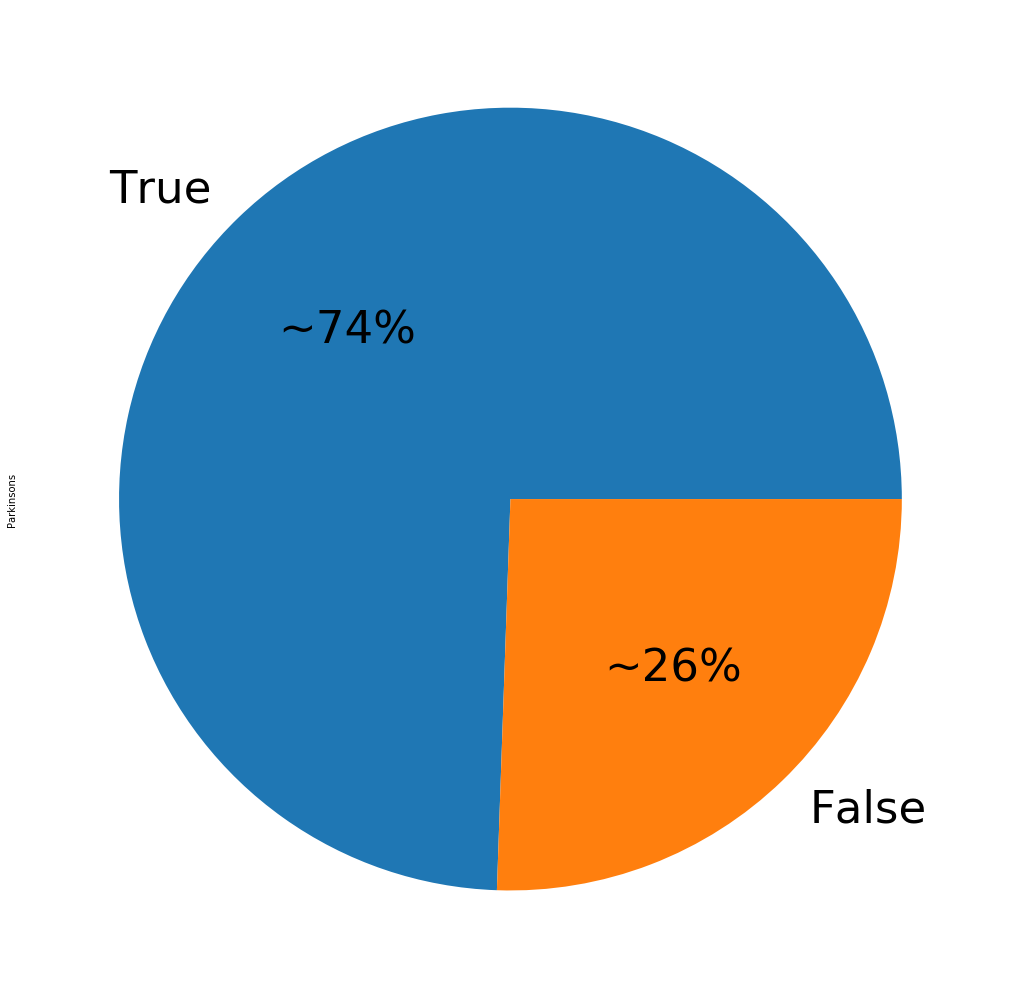

In [31]:
# The dataset is imbalanced. Most of the subjects/users have parkinson's
import matplotlib.pyplot as plt

pd.DataFrame(users_df['Parkinsons'].value_counts()).plot.pie(
  y='Parkinsons', autopct='~%1.f%%', figsize=(18,18), fontsize=45, legend=False
)
plt.show()

In [32]:
# Gender is consistent and kind of balanced
quick_value_counts_eval('Gender', users_df)

Total = 227 || Missing = 0 > 0.0%

Male      123
Female    104
Name: Gender, dtype: int64


In [33]:
# Missing birth year for a lot of records
quick_value_counts_eval('BirthYear', users_df)

Total = 187 || Missing = 40 > 17.62114537444934%

1947.0    11
1943.0    11
1949.0    10
1952.0    10
1942.0    10
1953.0     8
1958.0     8
1948.0     8
1941.0     8
1951.0     8
1946.0     8
1936.0     6
1938.0     6
1940.0     5
1965.0     5
1937.0     5
1945.0     4
1961.0     4
1959.0     4
1954.0     4
1956.0     3
1944.0     3
1960.0     3
1939.0     3
1950.0     3
1957.0     3
1985.0     2
1967.0     2
1929.0     2
1927.0     2
1962.0     2
1955.0     2
1934.0     2
1935.0     2
1963.0     1
1986.0     1
1969.0     1
1964.0     1
1930.0     1
1932.0     1
1970.0     1
1928.0     1
1933.0     1
1973.0     1
Name: BirthYear, dtype: int64


In [34]:
# For diagnosis year we are missing 19 + 55(the `------` string) => 74.
# Most likely, the majority will be users without parkinson's 
quick_value_counts_eval('DiagnosisYear', users_df)

Total = 208 || Missing = 19 > 8.370044052863436%

 ------    55
2016       38
2015       25
2014       13
2013       12
2012       10
2017        8
2008        7
2009        6
2004        5
2007        5
2010        5
2006        4
2011        2
2005        2
2000        2
2003        2
1996        2
1995        1
2002        1
1992        1
1991        1
1998        1
Name: DiagnosisYear, dtype: int64


In [35]:
# Great! No missing values here
quick_value_counts_eval('Sided', users_df)

Total = 227 || Missing = 0 > 0.0%

None     108
Right     60
Left      59
Name: Sided, dtype: int64


In [36]:
# UPDRS is totally discardable here. No relevant information
quick_value_counts_eval('UPDRS', users_df)

Total = 219 || Missing = 8 > 3.524229074889868%

Don't know    219
Name: UPDRS, dtype: int64


In [37]:
# Again 55 + 4. 55 for the `------`.
quick_value_counts_eval('Impact', users_df)

Total = 223 || Missing = 4 > 1.762114537444934%

Medium     74
Mild       70
 ------    55
Severe     24
Name: Impact, dtype: int64


In [48]:
# Those with "dashes" don't have parkinson
users_df[users_df['Impact'] == ' ------'].groupby('Parkinsons').count()

,Gender,BirthYear,Tremors,DiagnosisYear,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other
Parkinsons,,,,,,,,,,,
False,55,48,55,55,55,55,55,55,55,55,55


In [51]:
# Here are the 4 users without `Impact` defined. Since we might use this field, we should handle these NaNs
users_df[users_df['Impact'].isnull()]

,Gender,BirthYear,Parkinsons,Tremors,DiagnosisYear,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other
3MZWDTW7CC,Female,NaN,True,False,NaN,None,Don't know,NaN,False,False,False,False
QDV7XQWLI7,Male,1938.0,True,False,2016,None,Don't know,NaN,False,False,False,True
WY25WHLA9D,Male,NaN,True,False,NaN,Left,Don't know,NaN,True,False,False,False
ZEA4RST93H,Male,NaN,True,True,NaN,None,Don't know,NaN,True,False,False,False


In [60]:
# Let's get the mode for impact (we should use this later to fix these 4 records)
users_df[users_df.Parkinsons == True].Impact.mode()

0    Medium
dtype: object

### ==============================================================================================
### 2.2 Correlation check

In [38]:
# With a quick overview on the correlation we notice that gender and age have "no relation"
# with the target variable. It seems we can discard that. Levadopa is high, as expected, because
# it carries the target variable with it (we don't expect people without Parkinson's to take
# this medication).
temp_df = users_df.copy()

from sklearn.preprocessing import LabelEncoder
temp_df['Gender_encoded'] = LabelEncoder().fit_transform(temp_df['Gender'])

temp_df.corr()['Parkinsons'].sort_values(ascending=False)

Parkinsons        1.000000
Levadopa          0.578137
Tremors           0.477868
Other             0.387139
DA                0.241617
MAOB              0.155829
BirthYear         0.016863
Gender_encoded   -0.031882
Name: Parkinsons, dtype: float64

### ==============================================================================================
### 2.3 Merging / joining both datasets

In [39]:
# We know that the users dataset have fewer subjects than the tappy dataset, but how many?
temp_df = tappy_df.merge(users_df, how='inner', left_on='UserKey', right_index=True)
temp_df.head()

,UserKey,Date,Timestamp,Hand,Hold time,Direction,Latency time,Flight time,Gender,BirthYear,Parkinsons,Tremors,DiagnosisYear,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other
42,8TEUUGQBYB,160807,20:33:16.695,R,46.9,RR,187.5,140.6,Male,1935.0,True,True,2013,Right,Don't know,Severe,True,False,False,False
43,8TEUUGQBYB,160807,20:33:22.344,L,109.4,LL,406.3,281.3,Male,1935.0,True,True,2013,Right,Don't know,Severe,True,False,False,False
44,8TEUUGQBYB,160807,20:33:23.414,L,78.1,RL,312.5,242.2,Male,1935.0,True,True,2013,Right,Don't know,Severe,True,False,False,False
45,8TEUUGQBYB,160807,20:33:23.742,R,78.1,LR,328.1,250.0,Male,1935.0,True,True,2013,Right,Don't know,Severe,True,False,False,False
46,8TEUUGQBYB,160809,12:41:15.797,L,105.5,SL,488.3,378.9,Male,1935.0,True,True,2013,Right,Don't know,Severe,True,False,False,False


In [40]:
# Check the info
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9014158 entries, 42 to 9302356
Data columns (total 20 columns):
UserKey          object
Date             object
Timestamp        object
Hand             object
Hold time        float64
Direction        object
Latency time     float64
Flight time      float64
Gender           object
BirthYear        float64
Parkinsons       bool
Tremors          bool
DiagnosisYear    object
Sided            object
UPDRS            object
Impact           object
Levadopa         bool
DA               bool
MAOB             bool
Other            bool
dtypes: bool(6), float64(4), object(10)
memory usage: 1.1+ GB


In [41]:
# We'll lose 300k keystrokes from 49 users 
print(f'After the merge we are losing {len(tappy_df) - len(temp_df)} keystrokes')

users_count = tappy_df['UserKey'].value_counts()
print(f'Number of distinct users in the Tappy dataset: {users_count.shape[0]}')
users_count = temp_df['UserKey'].value_counts()
print(f'Number of distinct users in the merged dataset: {users_count.shape[0]}')

After the merge we are losing 301834 keystrokes
Number of distinct users in the Tappy dataset: 266
Number of distinct users in the merged dataset: 217


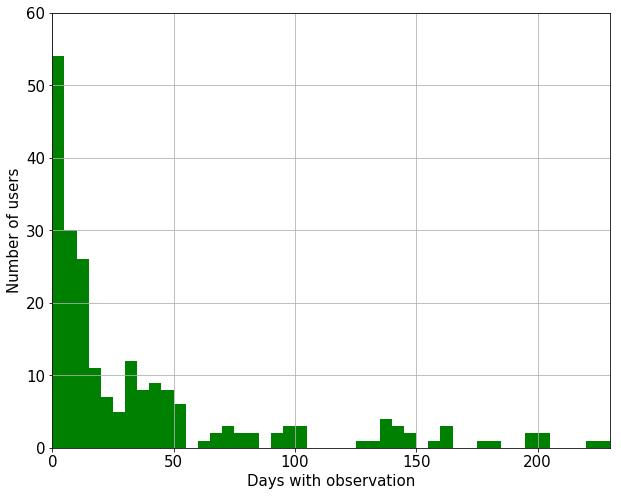

In [42]:
# Let's plot a histogram showing the amount of users in each bucket
import matplotlib.pyplot as plt
import numpy as np

temp_df2 = temp_df[['UserKey', 'Date']].groupby('UserKey').nunique()[['Date']]
temp_df2.rename(columns={'Date':'days_with_observation'}, inplace=True)
temp_df2.sort_values('days_with_observation', inplace=True)

# The bins are 0 to 4 days with observation, 5 to 9, 10 to 14, and so forth
bin_width = 5
bins = np.arange(0, max(temp_df2.days_with_observation) + bin_width, bin_width)

plt.figure(figsize=(10,8))
n, bins, patches = plt.hist(temp_df2.days_with_observation, bins=bins, facecolor='green')
plt.plot(bins, linewidth=0)

plt.xlabel('Days with observation', fontsize=15)
plt.ylabel('Number of users', fontsize=15)
plt.tick_params(labelsize=15)
plt.axis([0, max(temp_df2.days_with_observation), 0, 60])
plt.grid(True)

plt.show()

In [43]:
# What is the distribution of the users with 250 or less observations
temp_df2 = temp_df[['UserKey', 'Date']].groupby('UserKey').count()[['Date']]
temp_df2.rename(columns={'Date':'observations'}, inplace=True)
temp_df2.sort_values('observations', inplace=True)

temp_df3 = temp_df2[temp_df2.observations < 250]
temp_df3 = temp_df3.merge(users_df['Parkinsons'], how='inner', left_on='UserKey', right_index=True)
temp_df3['Parkinsons'].value_counts()

True     28
False    10
Name: Parkinsons, dtype: int64

Hold time outliers starting at 224.6
Latency time outliers starting at 564.5
Flight time outliers starting at 484.4


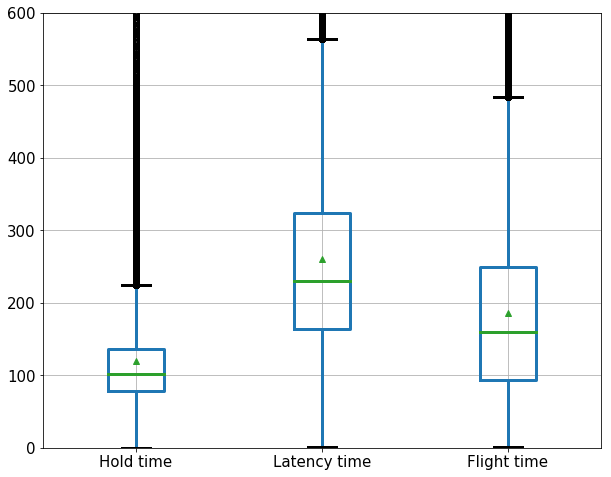

In [44]:
# Now the time columns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
ax, boxdata = temp_df.boxplot(
  column=['Hold time', 'Latency time','Flight time'], showfliers=True, showmeans=True,
  fontsize=15, return_type='both'
)
ax.set_ylim(0, 600)

for line_2d in boxdata.values():
  for item in line_2d:
    item.set_linewidth(3)

# Hold time has a much higher rate of outliers. The max value is 928765.60 which is 15 minutes of someone holding the key!!
# Either a bug on the recorder or someone slept on the computer
outliers_ht = boxdata['fliers'][0].get_ydata()
print(f'Hold time outliers starting at {min(outliers_ht)}')

outliers_lt = boxdata['fliers'][1].get_ydata()
print(f'Latency time outliers starting at {min(outliers_lt)}')

outliers_ft = boxdata['fliers'][2].get_ydata()
print(f'Flight time outliers starting at {min(outliers_ft)}')

plt.show()

### ==============================================================================================
### 2.4 Conclusions for users

- Our target variable is 100% present in the dataset, which is great
- Imbalanced dataset so our model might be biased to give a positive diagnosis. We have to be careful with that
- It seems all the other information should be discarded because:
  - Most of the variables carry **`y`** with it (i.e. is there is any `Impact`, the user has Parkinson)
  - Gender does not seem to have a strong correlation with parkinson
  - Same for BirthYear
- Unfortunately we'll have to drop tappy data from 49 users (around 300k records) because we have no target variable for them, so from 266 tappy users, we go down to 217

### ==============================================================================================
### 2.5 Dumping this raw users dataframe

In [45]:
# This will adjust the column names and dump the pandas dataframe,
# in the expected format, to the file system
UsersLoader().convert_and_dump_dataframe(users_df).head()

Dataframe exported to /content/gdrive/My Drive/project_scs3253/data/users_parsed_dataframe_file.csv


,userkey,gender,birthyear,parkinsons,tremors,diagnosisyear,sided,updrs,impact,levadopa,da,maob,other
0,M4ARHBY168,Female,1950.0,False,False,------,Left,Don't know,------,False,False,False,False
1,0EA27ICBLF,Female,1952.0,True,True,2000,Left,Don't know,Severe,True,True,False,False
2,E7UA8EHENF,Male,1951.0,True,True,2013,Right,Don't know,Medium,True,False,False,False
3,MDL9KS0SFL,Female,NaN,True,False,NaN,None,Don't know,Mild,False,False,True,True
4,0QAZFRHQHW,Female,1959.0,False,False,------,None,Don't know,------,False,False,False,False
